In [36]:
import os
from utils import load_caption, decode_caption, load_vocab, load_annotations
from nltk.translate import bleu_score

from tqdm import tqdm
import pickle
import numpy as np
from scipy.stats import linregress

from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [37]:
vocab = load_vocab('/home/spb61/coco2014_vocab.json')
image_id_to_index, index_to_image_id, annotations_dict = load_annotations(annotations_dir='/home/spb61/annotations',
                                                                          annotations_file='captions_val2014.json',
                                                                          map_file = '/home/spb61/val_image_id_to_idx.csv')

word_to_idx
idx_to_word
Loaded dictionary...
Dictionary size: 5004
Error proccessing image_id: image_index
Skipping file person_keypoints_train2014.json
Skipping file instances_train2014.json


In [38]:
voted_pickle_file='../outputs/vote_captions_100_unigram_overlap.pickle'
voted_captions = pickle.load(open(voted_pickle_file, 'rb'))

In [39]:
voted_bleus = []
voted_probs = []
for image_id, caption in tqdm(voted_captions.items()):
    voted_cap = decode_caption(caption[0][0], vocab)
    voted_bleus.append(bleu_score.sentence_bleu(annotations_dict[image_id], voted_cap))
    voted_probs.append(caption[1][0])

  0%|          | 0/40504 [00:00<?, ?it/s]/anaconda/envs/py35/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/anaconda/envs/py35/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/anaconda/envs/py35/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
100%|██████████| 40504/40504 [00:17<00:00, 2332.22it/s]


0.5491004867761125
0.00030461020598002327
Slope, intercept:  0.00010053815240792534 0.0003478974210114866
0.019113330422682893 0.00011961876012153741
0.14985197605321357


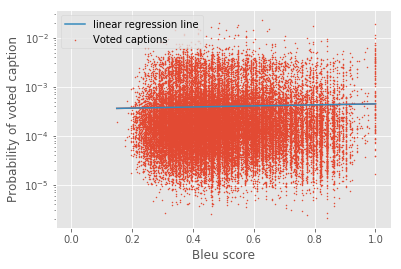

In [35]:
print(voted_bleus[0])
print(voted_probs[0])
slope, intercept, r_value, p_value, std_err = linregress(voted_bleus, voted_probs)
X = np.linspace(np.min(voted_bleus), np.max(voted_bleus), 100)
Y = X * slope + intercept
print("Slope, intercept: ", slope, intercept)
print(r_value, p_value)
plt.figure()
plt.plot(X, Y)
plt.yscale('log')
plt.scatter(voted_bleus, voted_probs, s=1, label="Voted captions")

plt.plot(X, Y, label="linear regression line")
plt.xlabel("Bleu score")
plt.ylabel("Probability of voted caption")
plt.xlim([-0.05, 1.05])
plt.legend()
print(np.min(voted_bleus))
plt.savefig("../outputs/figs/prob_bleu_voted.png", bbox_inces='tight')

# Correlation between vote score and Bleu score